# Tensorflow Tutorial

In [0]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Basic constant operations
a = tf.constant(2)
b = tf.constant(3)

# Launch the default graph.
with tf.Session() as sess:
    print("a=2, b=3")
    print("Addition with constants: %i" % sess.run(a+b))
    print("Multiplication with constants: %i" % sess.run(a*b))

a=2, b=3
Addition with constants: 5
Multiplication with constants: 6


In [0]:
# Basic Operations with variable as graph input
# tf Graph input

a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))


Addition with variables: 5
Multiplication with variables: 6


In [0]:
def print_tensor(o):
    with tf.Session() as sess:
        print(sess.run(o))
    
# Different ways to initialise
o = tf.constant(np.random.randn(4,3))
print_tensor(o)

o = tf.constant(np.zeros((4,3)))
print_tensor(o)

o = tf.constant(np.ones((4,3)))
print_tensor(o)

[[ 0.64235253 -0.09383701  2.21905855]
 [ 0.22354682 -0.8491673  -0.43368863]
 [ 0.67621314  0.39346917  0.1618179 ]
 [-0.50650363 -1.34578038  0.44782047]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [0]:
# Size of Tensor
size_o = tf.size(o)
print_tensor(size_o)

# Shape of Tensor
shape_o = tf.shape(o)
print_tensor(shape_o)

12
[4 3]


# Matrix Multiplication

In [0]:
# Matrix Multiplication from TensorFlow official tutorial

matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
product = tf.matmul(matrix1, matrix2)

# The output of the op is returned in 'result' as a numpy `ndarray` object.
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[12.]]


In [0]:
# Concatenate
t1 = [[1, 2, 3], [4, 5, 6]]
t2 = [[7, 8, 9], [10, 11, 12]]

a = tf.concat([t1, t2], 0) 
print_tensor(a)

b = tf.concat([t1, t2], 1) 
print_tensor(b)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [0]:
#Slice
t = tf.constant([[[1, 1, 1], [2, 2, 2]],
                 [[3, 3, 3], [4, 4, 4]],
                 [[5, 5, 5], [6, 6, 6]]])

a = tf.slice(t, [1, 0, 0], [1, 1, 3])  # [[[3, 3, 3]]]
print_tensor(a)

a = tf.slice(t, [1, 0, 0], [1, 2, 3])  # [[[3, 3, 3],
print_tensor(a)                       #   [4, 4, 4]]]

# As you can see, we have three dimensional tensor, which will break 
# down into separate array to help your imagination. 

# The first array is the first dimension, t = [[A], [B], [C]]. 
# Then the second dimension, A = [i, j], B = [k, l], C = [m, n]. 
# Finally, the third dimension i = [1, 1, 1], j = [2, 2, 2], k = [3, 3 ,3], 
# l = [4, 4, 4], m = [5, 5, 5], n = [6, 6, 6].

# Tensor Operations are similar to Numpy Operations

[[[3 3 3]]]
[[[3 3 3]
  [4 4 4]]]


# Example: Linear Regression 

In [0]:
learning_rate = 0.01
training_epochs = 1000
display_step = 100

# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Initialise variables in tf.Variable
init = tf.global_variables_initializer()

W0826 15:37:22.240013 140317093463936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch: 0100 cost= 0.366338700 W= 0.5502266 b= -1.3612655
Epoch: 0200 cost= 0.303358614 W= 0.51552993 b= -1.1116605
Epoch: 0300 cost= 0.254081994 W= 0.48483756 b= -0.8908619
Epoch: 0400 cost= 0.215528294 W= 0.4576878 b= -0.6955481
Epoch: 0500 cost= 0.185363889 W= 0.433671 b= -0.52277327
Epoch: 0600 cost= 0.161764130 W= 0.41242614 b= -0.36993936
Epoch: 0700 cost= 0.143300727 W= 0.39363328 b= -0.2347446
Epoch: 0800 cost= 0.128856078 W= 0.37700936 b= -0.11515328
Epoch: 0900 cost= 0.117555730 W= 0.36230412 b= -0.009364246
Epoch: 1000 cost= 0.108715490 W= 0.34929588 b= 0.084215514
Optimization Finished!
Training cost= 0.10871549 W= 0.34929588 b= 0.084215514 



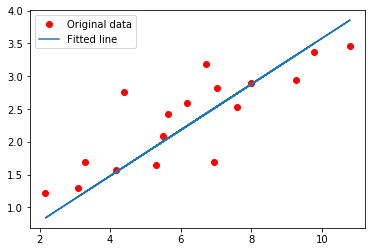

Testing... (Mean square loss Comparison)
Testing cost= 0.09466523
Absolute mean square loss difference: 0.01405026


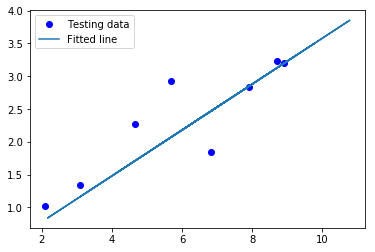

In [0]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]), feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

# Activation Functions

In [0]:
x = tf.lin_space(-3., 3., 24)
print_tensor(x)

[-3.         -2.7391305  -2.478261   -2.2173913  -1.9565217  -1.6956522
 -1.4347826  -1.173913   -0.9130435  -0.65217394 -0.39130437 -0.13043481
  0.13043475  0.3913043   0.6521739   0.91304344  1.173913    1.4347825
  1.6956521   1.9565217   2.2173913   2.4782608   2.7391305   3.        ]


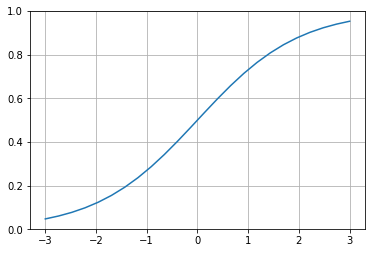

In [0]:
sigm = tf.nn.sigmoid(x)

with tf.Session() as sess:
    plt.plot(sess.run(x), sess.run(sigm))
    plt.grid()          

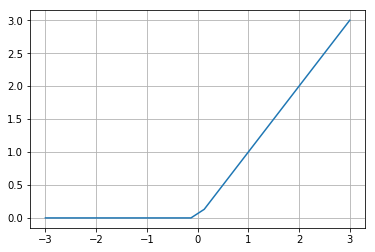

In [0]:
relu = tf.nn.relu(x)

with tf.Session() as sess:
    plt.plot(sess.run(x), sess.run(relu))
    plt.grid()

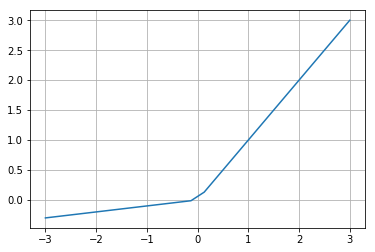

In [0]:
lrelu = tf.nn.leaky_relu(x, alpha = 0.1)

with tf.Session() as sess:
    plt.plot(sess.run(x), sess.run(lrelu))
    plt.grid()

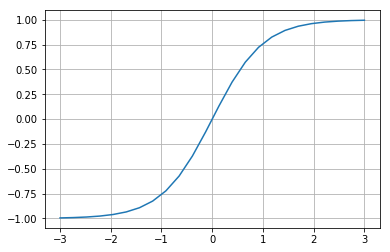

In [0]:
tanh = tf.nn.tanh(x)

with tf.Session() as sess:
    plt.plot(sess.run(x), sess.run(tanh))
    plt.grid()

In [0]:
x = tf.constant([4,4,2],'float64')
softmax = tf.nn.softmax(x)

print_tensor(softmax)

[0.46831053 0.46831053 0.06337894]


In [0]:
print(np.sum([0.46831053, 0.46831053, 0.06337894]))

1.0


# Optimisation Functions



IMDB_Reviews


In [0]:
from tensorflow import keras
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [0]:
train_text = []
for i in train_data:
  train_text.append(decode_review(i))

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=True)
vectorizer.fit(train_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
one_hot = vectorizer.transform(train_text).toarray()

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(one_hot)

In [0]:
learning_rate = 0.001
training_epochs = 2000
display_step = 100

train_X = principalComponents[:1000]
train_Y = np.array([train_labels]).T[:1000]
n_samples = train_X.shape[0]
n_features = train_X.shape[1]

X = tf.placeholder("float64")
Y = tf.placeholder("float64")

W = tf.Variable(np.random.randn(n_features).T, name="weight")
b = tf.Variable(np.random.randn(n_features).T.astype(np.float64), name="bias")

pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    avg_loss_gd = np.zeros(training_epochs)
    
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
        
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})   
        avg_loss_gd[epoch] = c
            
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

In [0]:
# AdaDelta
optimizer = tf.train.AdadeltaOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    avg_loss_adadelta = np.zeros(training_epochs)
    
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
            
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})   
        avg_loss_adadelta[epoch] = c
        
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

In [0]:
# Momentum
optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9, use_nesterov=True).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    avg_loss_momentum = np.zeros(training_epochs)
    
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
            
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})   
        avg_loss_momentum[epoch] = c
        
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

In [0]:
# RMS Prop
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    avg_loss_rmsprop = np.zeros(training_epochs)
    
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
        
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})   
        avg_loss_rmsprop[epoch] = c
        
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

In [0]:
# Adam
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    avg_loss_adam = np.zeros(training_epochs)
    
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
        
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})   
        avg_loss_adam[epoch] = c
        
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

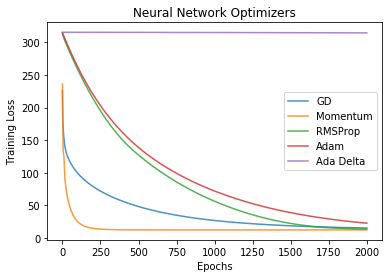

In [0]:
plt.figure()
plt.plot(avg_loss_gd, alpha=0.8, label='GD')
plt.plot(avg_loss_momentum, alpha=0.8, label='Momentum')
plt.plot(avg_loss_rmsprop, alpha=0.8, label='RMSProp')
plt.plot(avg_loss_adam, alpha=0.8, label='Adam')
plt.plot(avg_loss_adadelta, alpha=0.8, label='Ada Delta')
plt.title("Neural Network Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

## References

- https://www.tensorflow.org/tutorials/text/text_generation
- https://github.com/aymericdamien/TensorFlow-Examples